* @Author : Pramil Paudel, Sumit Bhattarai
* Development Env : Jupyter Lab
* Module : Severity Analysis and Forecasting 
* Summary : This module will perform Severity Analysis using EDA and finally prepare data for time series forcasting using ARIMA and fbprophet. 

In [1463]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.display import Image
import pydotplus
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from fbprophet import Prophet
print("Loaded Successfully -- -- -- -- -- -- -- -- -- -- -- -- --")

Loaded Successfully -- -- -- -- -- -- -- -- -- -- -- -- --


#### Defining input/output directory

In [1464]:
input_path = "../../data/raw/"
output_path = "../../data/pre_processing/"
image_path = "../../figures/"

#### Load dataset as Dataframe

In [1465]:
df = pd.read_csv(input_path+"US_Accidents_June20.csv", parse_dates=['Start_Time','End_Time'])
df.head()
df.tail()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day
3513616,A-3513780,Bing,NaN,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,...,False,False,False,False,False,False,Day,Day,Day,Day


### Check basic statistics

In [1466]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


### Check Datatype of the columns.

In [1467]:
df.dtypes

ID                               object
Source                           object
TMC                             float64
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64


### Check NaN values

In [1468]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

* The severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). 

In [1469]:
columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

In [1470]:
def bar_plot (xs, ys, df, fx, fy, title=''):
    fig, ax = plt.subplots(figsize = (fx, fy))
    sns.set_context("paper")
    bar = sns.barplot(x = xs, y = ys, data = df)
    bar.set_title(title)
    plt.savefig(f'../../figures/{title}.jpeg')
    plt.show()

## Visualization
We will visualize the plots based on different features of the dataset. Later, we will analyze the severity and severity rate for different features.

#### State vs Accident

In [1471]:
df_state = df.groupby('State')['ID'].agg(len).sort_values(ascending = False).to_frame().reset_index().rename(columns = {'ID': 'Count'})

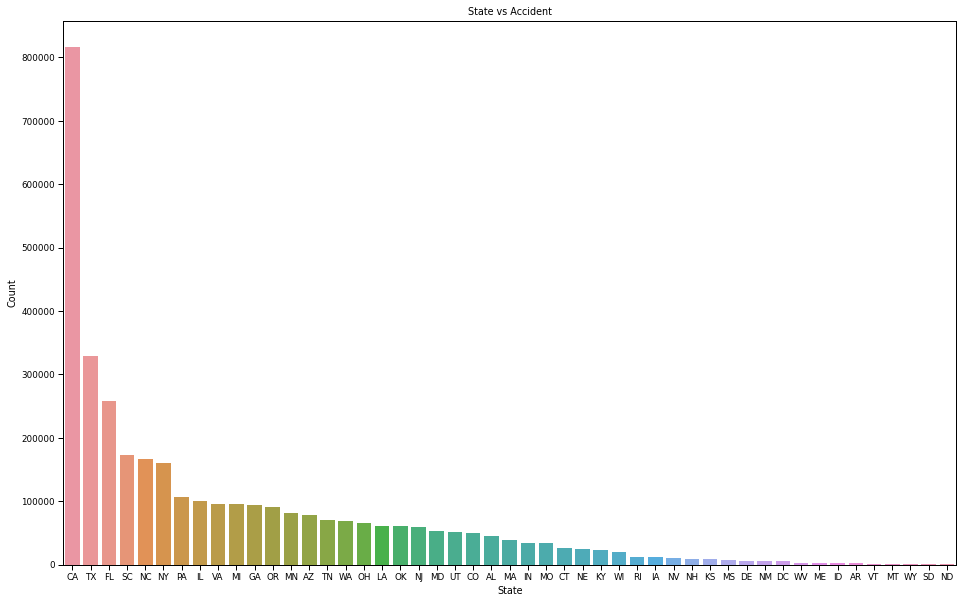

In [1472]:
bar_plot('State', 'Count', df_state, 16, 10, 'State vs Accident')

* The accident is higher in CA while it's lower in ND.

#### City vs Accident

In [1473]:
df_city = df.groupby('City')['ID'].agg(len).sort_values(ascending = False).to_frame().reset_index().rename(columns = {'ID': 'Count'})

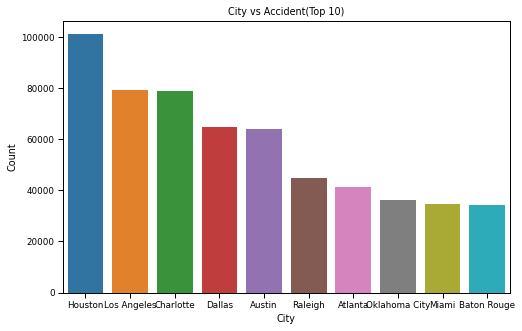

In [1474]:
bar_plot('City', 'Count', df_city[:10], 8, 5, 'City vs Accident(Top 10)')

* Houston has more accident.
* The accident is higher in bigger cities.

### Year vs Accident

In [1475]:
df['Year'] = df.Start_Time.dt.year
df_year = df.groupby('Year')['ID'].agg(len).sort_values(ascending = False).to_frame().reset_index().rename(columns = {'ID': 'Count'})

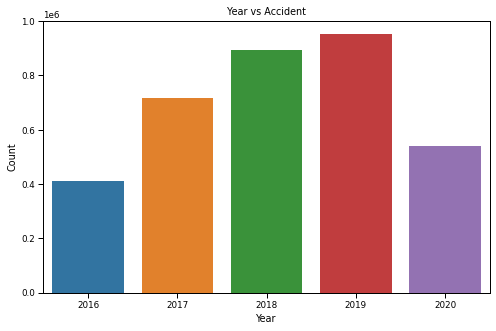

In [1476]:
bar_plot('Year', 'Count', df_year, 8, 5, 'Year vs Accident')

* The accident number increased upto 2019.
* The reason for less number of accident is because of the data which is limited to June, 2020.

### Month vs Accident

In [1477]:
df_lt_2020 = df[df['Year'] < 2020]
df_lt_2020['Month'] = df_lt_2020.Start_Time.dt.month
df_month = df_lt_2020.groupby('Month')['ID'].agg(len).sort_values(ascending = False).to_frame().reset_index().rename(columns = {'ID': 'Count'})

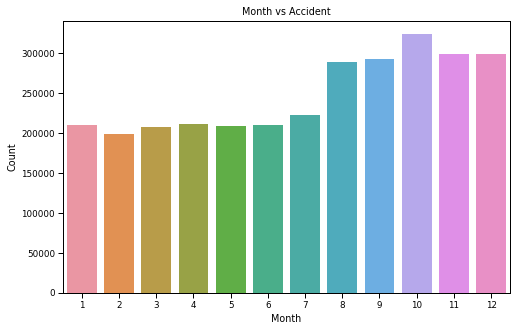

In [1478]:
bar_plot('Month', 'Count', df_month, 8, 5, 'Month vs Accident')

* The number of accident are higher from August to December.

* Let's see by excluding data from 2016 as the numbers are very low for first six month.

In [1479]:
df_16_19 = df[df['Year'] < 2020]
df_16_19 = df_16_19[df_16_19['Year'] > 2016]
df_16_19['Month'] = df_16_19.Start_Time.dt.month
df_month_1619 = df_16_19.groupby('Month')['ID'].agg(len).sort_values(ascending = False).to_frame().reset_index().rename(columns = {'ID': 'Count'})

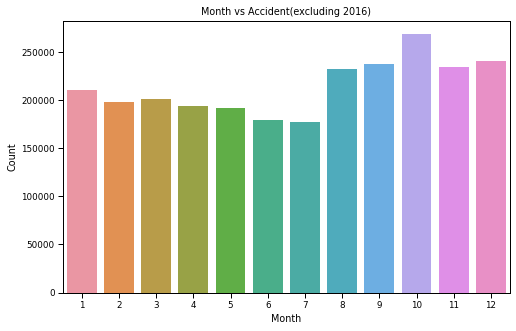

In [1480]:
bar_plot('Month', 'Count', df_month_1619, 8, 5, 'Month vs Accident(excluding 2016)')

* It had slight effect for first five month.

### Day vs Accident

In [1481]:
df['Day'] = df.Start_Time.dt.weekday
df_day = df.groupby('Day')['ID'].agg(len).sort_values(ascending = False).to_frame().reset_index().rename(columns = {'ID': 'Count'})

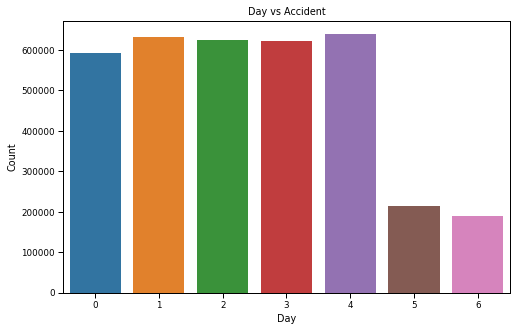

In [1482]:
bar_plot('Day', 'Count', df_day, 8, 5, 'Day vs Accident')

* The accident occurs mostly in weekdays and is highest on Friday.

## Hour vs Accident

In [1483]:
df['Hour'] = df.Start_Time.dt.hour
df_hour = df.groupby('Hour')['ID'].agg(len).to_frame().reset_index().rename(columns = {'ID': 'Count'})

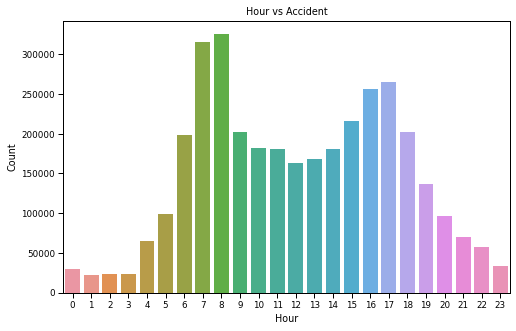

In [1484]:
bar_plot('Hour', 'Count', df_hour, 8, 5, 'Hour vs Accident')

* The number of accident reported were higher at 6:00 am and 7:00 am and 4:00pm and 5:00 pm .
* It started decreasing after 5 and was low from 1:00 am to 3:00 am.

## Length of Accident

In [1485]:
df['Length'] = (df.End_Time - df.Start_Time)
data = [df["State"], df["Length"]]
headers = ["State", "Length"]
df_length = pd.concat(data, axis=1, keys=headers)

In [1486]:
print('minimum length\n', df_length.min())
print('maximum length\n', df_length.max())

minimum length
 State                    AL
Length    -1 days +23:25:55
dtype: object
maximum length
 State                    WY
Length    987 days 11:15:29
dtype: object


* The minimimum time affected by the accident is negative while the maximum time is 987 days. The data should be anamolous.

## Severity of Accident

In [1487]:
df_severity = df.groupby('Severity')['ID'].agg(len).to_frame().reset_index().rename(columns = {'ID': 'Count'})

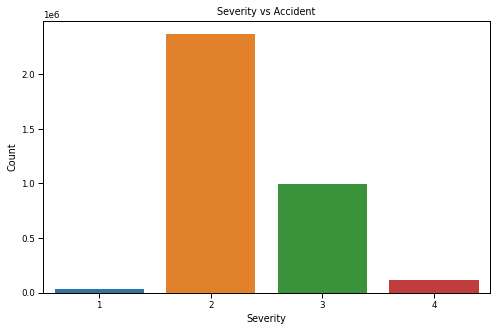

In [1488]:
bar_plot('Severity', 'Count', df_severity, 8, 5, 'Severity vs Accident')

* Most of the accident reported were neither highly severe nor less.

In [1489]:
def rate_df (df_st):
    df_rate = df_st.reset_index()
    index_name = df_st.index.name
    df_rate = df_rate.set_index(index_name)
    df_rate = df_rate.div(df_rate.sum(axis=1), axis=0)
    return df_rate

### Severity By State

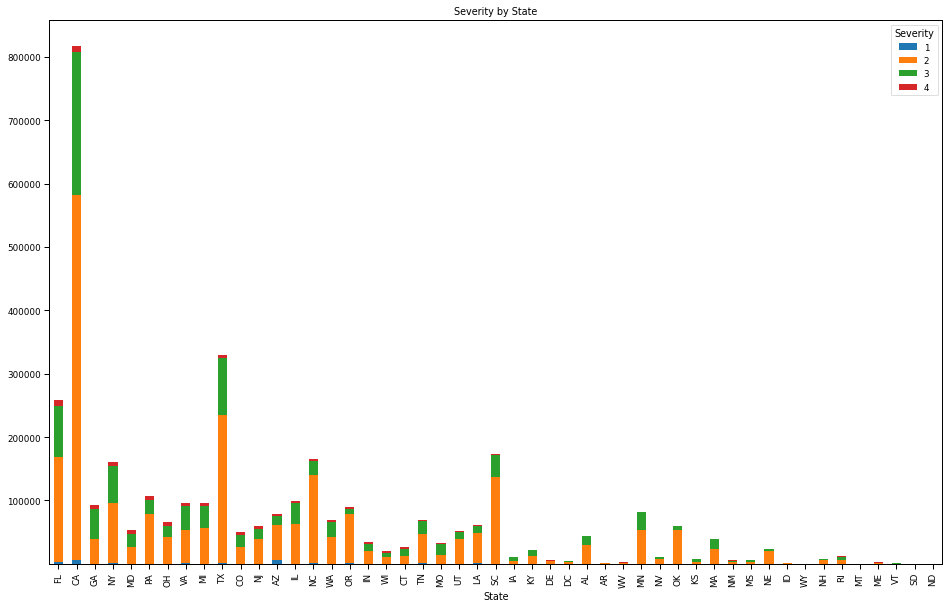

In [1490]:
df_severe_state = df.groupby(['Severity','State']).size().reset_index().pivot(\
    columns='Severity', index='State', values=0)
df_severe_state = df_severe_state.sort_values(by=[4], ascending = False)
df_severe_state.plot(kind='bar', stacked=True, title='Severity by State', figsize=(16,10)).get_figure().savefig(f'{image_path}Severity by State.jpeg')

* Highly severe accident were reported in Florida.
* AZ, CA, FL are the states with less severe accident.
* Most of the accident are of level 2.

### Severity vs City (Top 10)

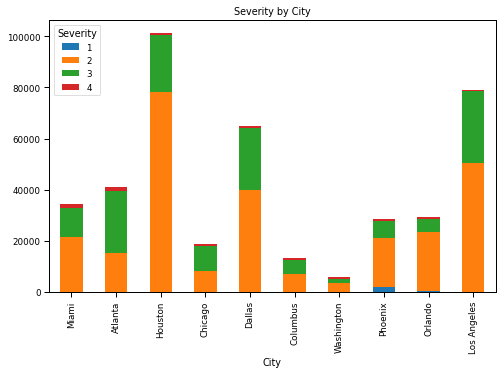

In [1491]:
df_severe_city = df.groupby(['Severity','City']).size().reset_index().pivot(\
    columns='Severity', index='City', values=0)
df_severe_city = df_severe_city.sort_values(by=[4], ascending = False)
df_severe_city[:10].plot(kind='bar', stacked=True, title='Severity by City', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity by City.jpeg')

* The highest number of highly severe accident occurred in Maimi. Among these Washington has lowest number of accident and stays on 6th position for highly severe accident.

### Severity vs Wind Direction
First, I will change the column values that are equivalent.

In [1492]:
print(df.Wind_Direction.unique())
df.loc[(df.Wind_Direction == 'Calm'),'Wind_Direction']='CALM'
df.loc[(df.Wind_Direction == 'East'),'Wind_Direction']='E'
df.loc[(df.Wind_Direction == 'West'),'Wind_Direction']='W'
df.loc[(df.Wind_Direction == 'North'),'Wind_Direction']='N'
df.loc[(df.Wind_Direction == 'South'),'Wind_Direction']='S'
df.loc[(df.Wind_Direction == 'Variable'),'Wind_Direction']='VAR'
df.Wind_Direction.unique()

['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


array(['CALM', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'W', 'NNW', 'NNE', 'S',
       'N', 'VAR', 'SE', 'SSE', 'ESE', 'E', 'NE', 'ENE', nan],
      dtype=object)

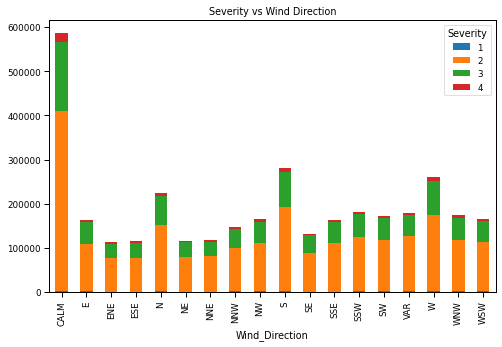

In [1493]:
df_severe_wind = df.groupby(['Severity','Wind_Direction']).size().reset_index().pivot(\
    columns='Severity', index='Wind_Direction', values=0)
df_severe_wind.plot(kind='bar', stacked=True, title='Severity vs Wind Direction', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity vs Wind Direction.jpeg')

* Severity is high when the wind condition is calm and so is the number of accident. 

### Severity vs Day/Night

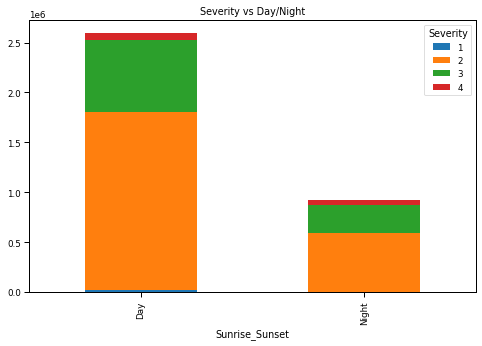

In [1494]:
df_severe_day = df.groupby(['Severity','Sunrise_Sunset']).size().reset_index().pivot(\
    columns='Severity', index='Sunrise_Sunset', values=0)
df_severe_day.plot(kind='bar', stacked=True, title='Severity vs Day/Night', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity vs Day_Night.jpeg')

* Slightly more severe accident occuring in day. 
* The number of highly severe accident is mostly proportion to the number of accident. So, it will be better to compare the severity rate instead of just count of severity.

### Severity Rate By State

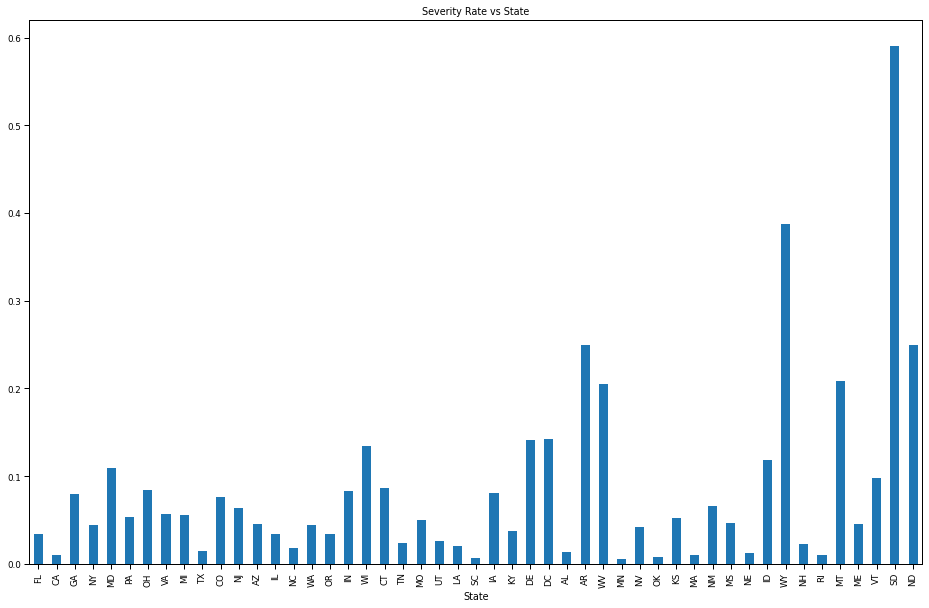

In [1495]:
df_severity_state_rate = rate_df(df_severe_state)
df_severity_state_rate[4].plot(kind='bar', title='Severity Rate vs State', figsize=(16,10)).get_figure().savefig(f'{image_path}Severity Rate vs State.jpeg')

* The accident occured with highest severity rate in South Dakota.
* Lowest rate was in Minnesota

### Severity Rate vs Wind Direction

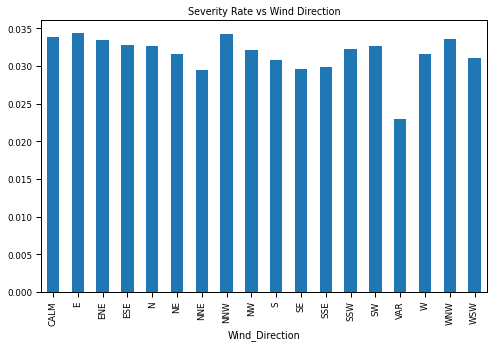

In [1496]:
df_severity_wind_rate = rate_df(df_severe_wind)
df_severity_wind_rate[4].plot(kind='bar', title='Severity Rate vs Wind Direction', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity Rate vs Wind Direction.jpeg')

* The rate is almost greater than 3% for each wind direction except for variable.

### Severity Rate vs Day/Night

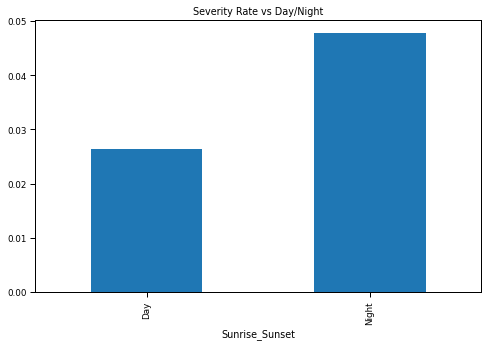

In [1497]:
df_severity_day_rate = rate_df(df_severe_day)
df_severity_day_rate[4].plot(kind='bar', title='Severity Rate vs Day/Night', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity Rate vs Day_Night.jpeg')

* We can see that the rate of severity is high during night.

### Severity Rate vs Juction

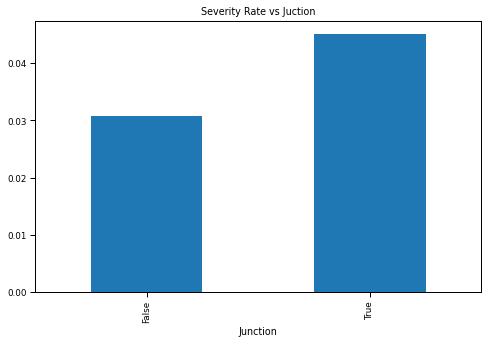

In [1498]:
df_severe_juction = df.groupby(['Severity','Junction']).size().reset_index().pivot(\
    columns='Severity', index='Junction', values=0)
df_severe_juction_rate = rate_df(df_severe_juction)
df_severe_juction_rate[4].plot(kind='bar', title='Severity Rate vs Juction', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity Rate vs Juction.jpeg')

* As expected, it is high in Jucntion.

#### Severity Rate vs Railway

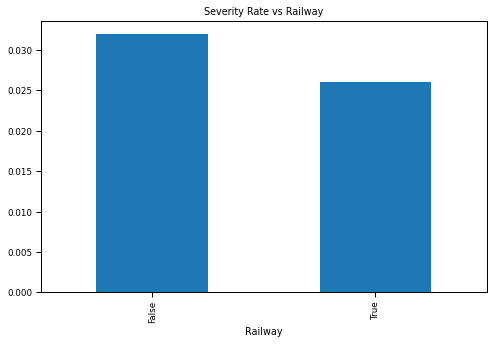

In [1499]:
df_severe_railroad = df.groupby(['Severity','Railway']).size().reset_index().pivot(\
    columns='Severity', index='Railway', values=0)
df_severe_railroad_rate = rate_df(df_severe_railroad)
df_severe_railroad_rate[4].plot(kind='bar', title='Severity Rate vs Railway', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity Rate vs Railway.jpeg')

* The severetiy rate is low in railway.

#### Severity Rate vs Crossing

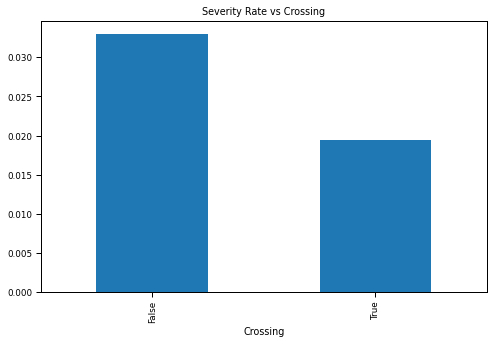

In [1500]:
df_severe_crossing = df.groupby(['Severity','Crossing']).size().reset_index().pivot(\
    columns='Severity', index='Crossing', values=0)
df_severe_crossing_rate = rate_df(df_severe_crossing)
df_severe_crossing_rate[4].plot(kind='bar', title='Severity Rate vs Crossing', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity Rate vs Crossing.jpeg')

* Rate is low when compared to crossings.

### Severity Rate vs Traffic Signals

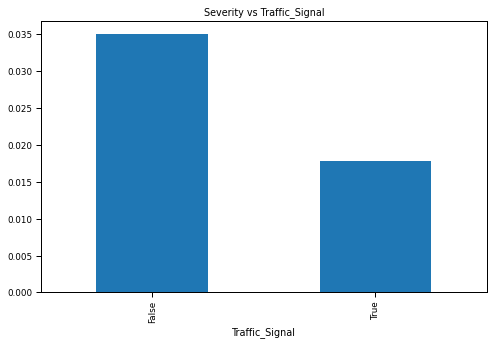

In [1501]:
df_severe_Traffic_Signal = df.groupby(['Severity','Traffic_Signal']).size().reset_index().pivot(\
    columns='Severity', index='Traffic_Signal', values=0)
df_severe_Traffic_Signal_rate = rate_df(df_severe_Traffic_Signal)
df_severe_Traffic_Signal_rate[4].plot(kind='bar', title='Severity vs Traffic_Signal', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity by Traffic Signal.jpeg')

* The severity rate is low in the area corresponding to traffic signal.

### Severity Rate vs Turning_Loop

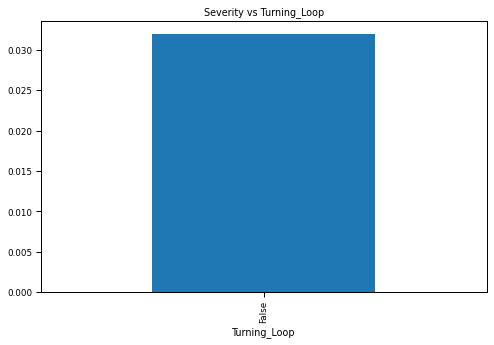

In [1502]:
df_severe_Turning_Loop = df.groupby(['Severity','Turning_Loop']).size().reset_index().pivot(\
    columns='Severity', index='Turning_Loop', values=0)
df_severe_Turning_Loop_rate = rate_df(df_severe_Turning_Loop)
df_severe_Turning_Loop_rate[4].plot(kind='bar', title='Severity vs Turning_Loop', figsize=(8,5)).get_figure().savefig(f'{image_path}Severity vs Turning_Loop.jpeg')

* No severe accident occured at Turning Loop.

## Conclusion

* State with severe climate condition like South Dakota, North Dakota has highest severity rate.
* Biggest states like California, Florida, etc., has lowest severity rate.
* It seems most of the people are cautious in areas with crossing, traffic signal, turning loops, etc.
* No severe accident were reported in turning loops.
* Severity rate is high for accident reported at Night. 
* Almost every wind direction has similar severity rate.